In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#ignore warning
import warnings
warnings.filterwarnings("ignore")

##***Load dataset of Haberman's Survival Data***

In [42]:
df=pd.read_csv("/content/Haberman's Survival Data.csv",header=None)
df

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [43]:
#shape of dataset
df.shape

(306, 4)

#Rename column name
-Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)

In [44]:
# Rename the columns
df.columns = ['Age', 'Year_of_Operation', 'Positive_Axillary_Nodes', 'Survival_Status']

# Display the renamed DataFrame
print(df)

     Age  Year_of_Operation  Positive_Axillary_Nodes  Survival_Status
0     30                 64                        1                1
1     30                 62                        3                1
2     30                 65                        0                1
3     31                 59                        2                1
4     31                 65                        4                1
..   ...                ...                      ...              ...
301   75                 62                        1                1
302   76                 67                        0                1
303   77                 65                        3                1
304   78                 65                        1                2
305   83                 58                        2                2

[306 rows x 4 columns]


In [45]:
#columns are in dataset
df.columns

Index(['Age', 'Year_of_Operation', 'Positive_Axillary_Nodes',
       'Survival_Status'],
      dtype='object')

In [46]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      306 non-null    int64
 1   Year_of_Operation        306 non-null    int64
 2   Positive_Axillary_Nodes  306 non-null    int64
 3   Survival_Status          306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [60]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Age                        0
Year_of_Operation          0
Positive_Axillary_Nodes    0
Survival_Status            0
dtype: int64


In [47]:
df.describe()

,Age,Year_of_Operation,Positive_Axillary_Nodes,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#correlation of features

In [48]:
#corelation between feature
df.corr()

,Age,Year_of_Operation,Positive_Axillary_Nodes,Survival_Status
Age,1.000000,0.089529,-0.063176,0.067950
Year_of_Operation,0.089529,1.000000,-0.003764,-0.004768
Positive_Axillary_Nodes,-0.063176,-0.003764,1.000000,0.286768
Survival_Status,0.067950,-0.004768,0.286768,1.000000


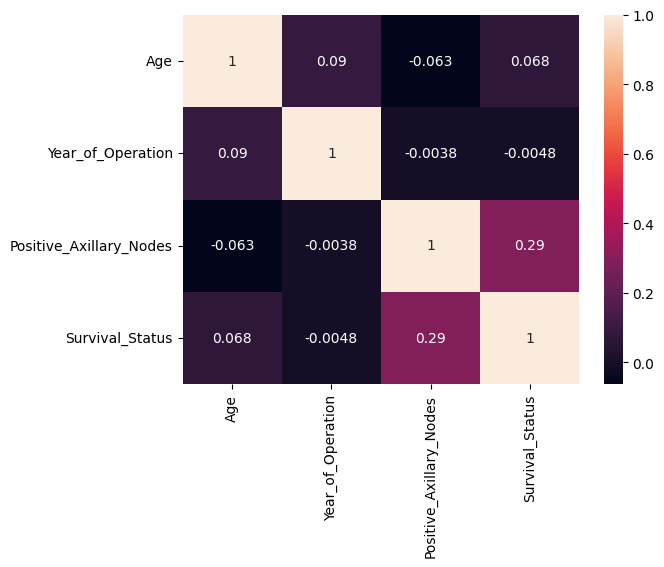

In [49]:
#plot heatmap on feature relation
sns.heatmap(df.corr(),annot=True)
plt.show()

#Target:
   . Survival status (class attribute)\
         1 = the patient survived 5 years or longer\
         2 = the patient died within 5 year

In [50]:
df["Survival_Status"] = df["Survival_Status"].map({1:"Patient_Survived", 2:"Pateint_Died"})

In [51]:
#value counts of survival
value_couants_suvivl=df['Survival_Status'].value_counts()
value_couants_suvivl

,count
Survival_Status,
Patient_Survived,225
Pateint_Died,81


In [52]:
# Calculate the Percentage of each Class
df["Survival_Status"].value_counts()*100/df.shape[0]

,count
Survival_Status,
Patient_Survived,73.529412
Pateint_Died,26.470588


Observation:

73.52% of Class 1 patients survived 5 years or longer\
26.47% of Class 2 patients died within 5 years

##***Exploratory Data Analysis***

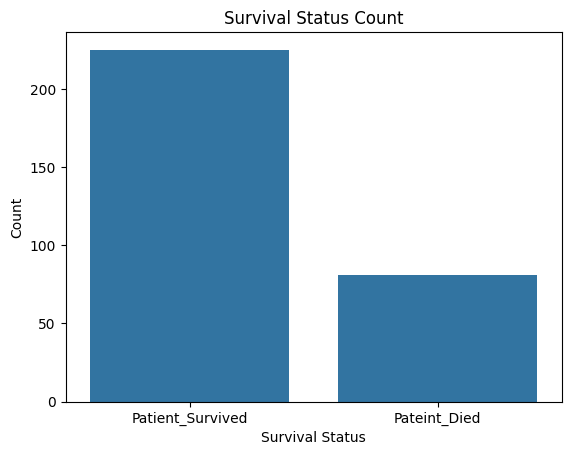

In [53]:
#survival staus count bar chart
sns.barplot(value_couants_suvivl)
plt.title('Survival Status Count')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()

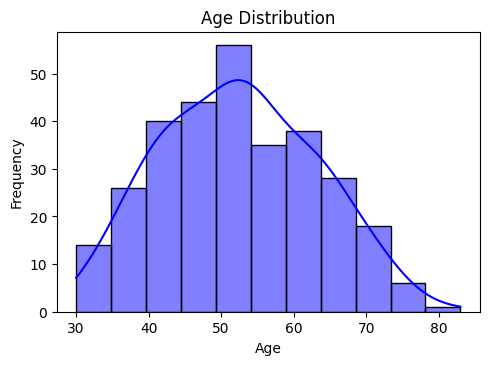

In [61]:
# Distribution of each variable
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

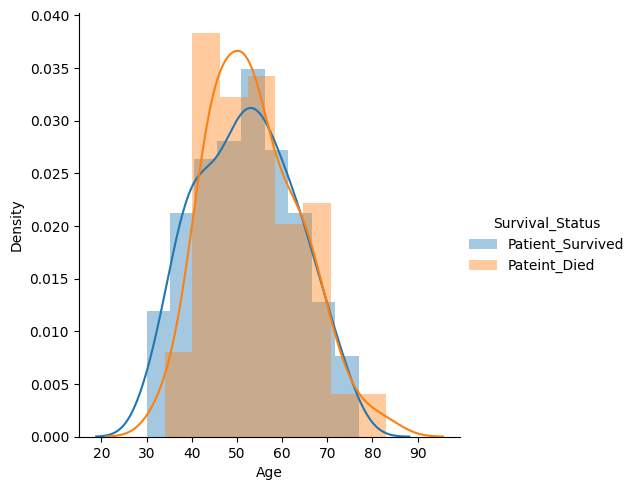

In [54]:
#survival status distribution on basics of Age
sns.FacetGrid(df, hue = 'Survival_Status',height=5, ).map(sns.distplot, "Age").add_legend()

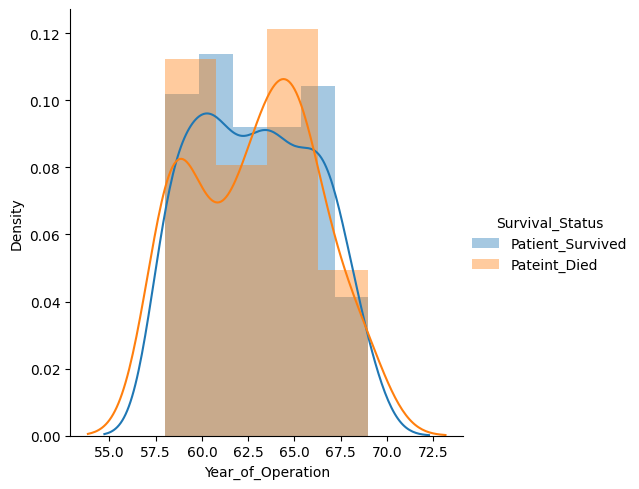

In [55]:
#survivsl_status distribution on year of operation
sns.FacetGrid(df,hue='Survival_Status',height=5,).map(sns.distplot,'Year_of_Operation').add_legend()

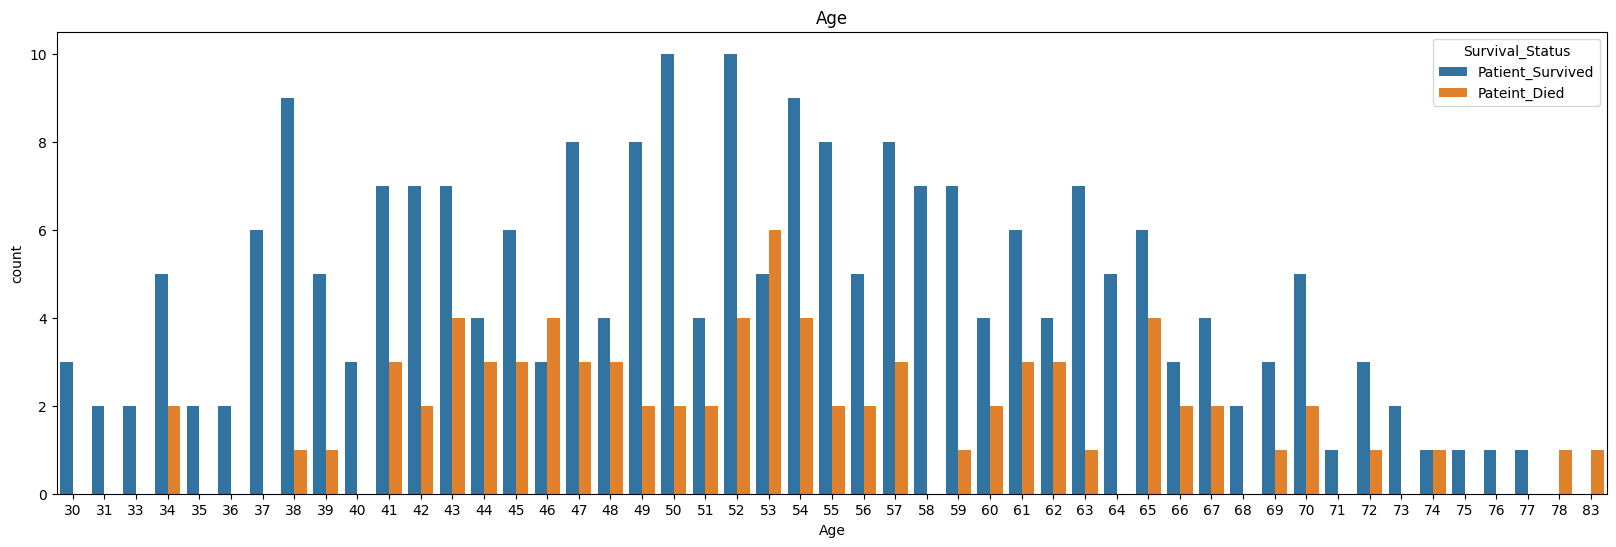

In [56]:
#survival status in term of agewise
plt.figure(figsize=(20,6))
sns.countplot(data = df, x = 'Age', hue = 'Survival_Status')
plt.title('Age')
plt.show()

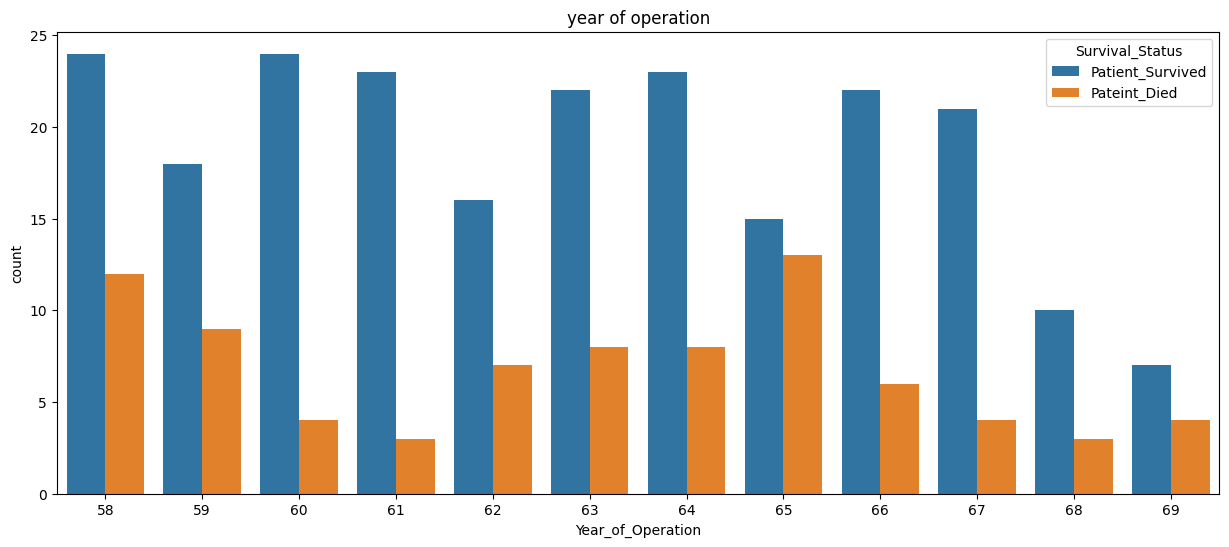

In [57]:
#year of treatment and suvival_status
plt.figure(figsize=(15,6))
sns.countplot(data = df, x = 'Year_of_Operation', hue='Survival_Status')
plt.title('year of operation')
plt.show()

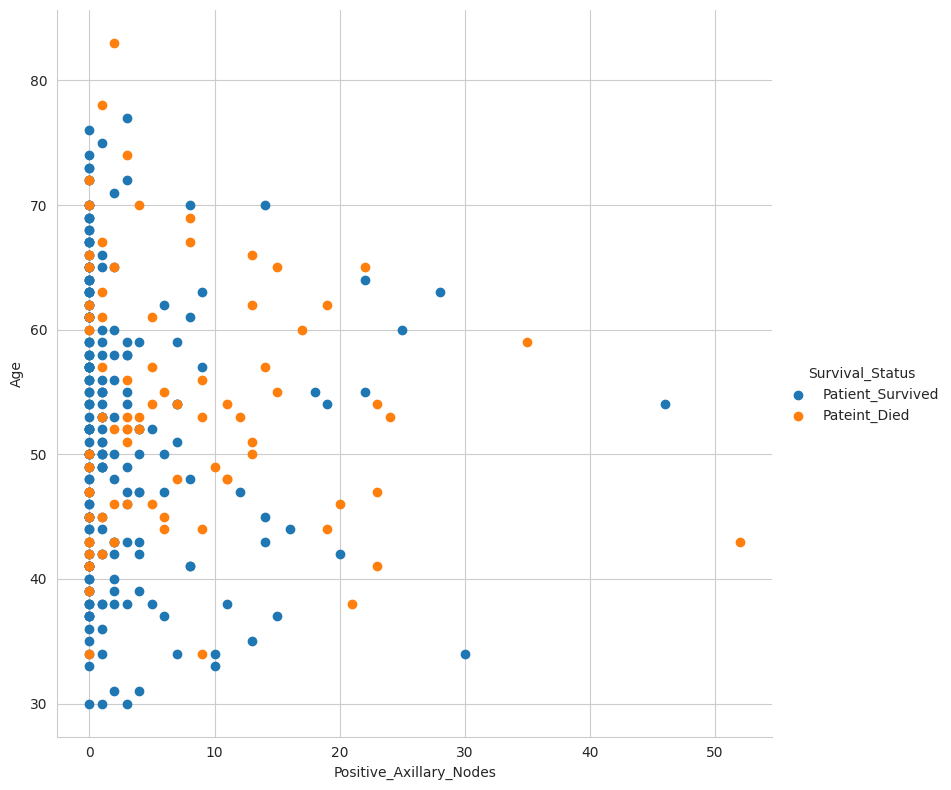

In [65]:
#It is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Survival_Status' , height = 8)\
 .map(plt.scatter,'Positive_Axillary_Nodes','Age')\
 .add_legend()
plt.show()

Target:\
   Survival status (class attribute)\
         1 = the patient survived 5 years or longer\
         2 = the patient died within 5 year

In [66]:
#again convert the survival_status in to 1 ,2
df["Survival_Status"] = df["Survival_Status"].map({"Patient_Survived":1, "Pateint_Died":2})

In [67]:
#data type check in dataset
df.dtypes

,0
Age,int64
Year_of_Operation,int64
Positive_Axillary_Nodes,int64
Survival_Status,int64


In [70]:
#correlation
df.corr()

,Age,Year_of_Operation,Positive_Axillary_Nodes,Survival_Status
Age,1.000000,0.089529,-0.063176,0.067950
Year_of_Operation,0.089529,1.000000,-0.003764,-0.004768
Positive_Axillary_Nodes,-0.063176,-0.003764,1.000000,0.286768
Survival_Status,0.067950,-0.004768,0.286768,1.000000


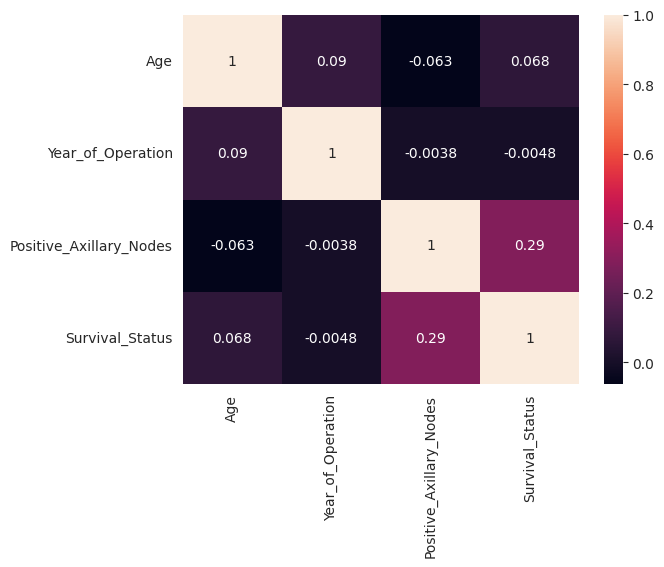

In [69]:
#plot heatmap on feature relation
sns.heatmap(df.corr(),annot=True)
plt.show()

In [68]:
#X,y from dataset
X=df.drop("Survival_Status",axis=1)
y=df["Survival_Status"]

In [85]:
X.head()

,Age,Year_of_Operation,Positive_Axillary_Nodes
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4


In [71]:
X.shape,y.shape

((306, 3), (306,))

#spliting the dataset in train and test dataset

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [74]:
# Standardize the features (this step is optional but often recommended for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
# Define a list of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}


In [80]:
# Dictionary to store the accuracy of each model
model_accuracies = {}

# Loop through the classifiers
for name, model in classifiers.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy*100:.4f}")


Logistic Regression Accuracy: 72.8261
Decision Tree Accuracy: 64.1304
Random Forest Accuracy: 68.4783
K-Nearest Neighbors Accuracy: 76.0870
Support Vector Machine Accuracy: 75.0000
Naive Bayes Accuracy: 72.8261
Gradient Boosting Accuracy: 70.6522


In [82]:
# Find the best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = classifiers[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {model_accuracies[best_model_name]*100:.4f}")


Best Model: K-Nearest Neighbors with Accuracy: 76.0870


#Save model

In [83]:
import pickle

In [84]:
# Save the best model
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
    print(f"\nBest model saved as 'best_model.pkl'")


Best model saved as 'best_model.pkl'


#Load model

In [86]:
# Load the best model from the file
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [87]:
# take the input data for test model
input_data = pd.DataFrame({
    'Age': [30, 30, 30, 31, 31],
    'Year_of_Operation': [64, 62, 65, 59, 65],
    'Positive_Axillary_Nodes': [1, 3, 0, 2, 4]
})

In [88]:
#we need to standardize the input data
scaler = StandardScaler()
# Fit the scaler on training data and transform the input data
X_train_scaled = scaler.fit_transform(input_data)

In [93]:
# Apply the best model to the input data
predictions = loaded_model.predict(X_train_scaled)

# Map the predictions back to the original class labels
# 1 = the patient survived 5 years or longer, 2 = the patient died within 5 years
predictions = np.where(predictions == 1, "Survived", "Died")

# Output the predictions
for i, prediction in enumerate(predictions):
    print(f"Input {i}: {prediction}")

Input 0: Died
Input 1: Survived
Input 2: Survived
Input 3: Died
Input 4: Died
